### This dataset contains information about the top 1000 highest grossing hollywood films. It is up to date as of 10th January 2022.
### With the help of this dataset, we performed a detailed market analysis over various attributes.

In [ ]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import cufflinks as cf
from scipy import stats

import matplotlib.pyplot as plt

In [ ]:
# READING THE DATASET

df = pd.read_csv("DATA_MINING_PROJECT.csv")
df.head(2)

,Unnamed: 0,Title,Distributor,Release Date,Domestic Sales,International Sales,World Sales,Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13


In [ ]:
# CALCULATING THE NUMBER OF ROWS AND COLUMNS

def rows_and_cols(value):
    row = df.shape[0]
    col = df.shape[1]
    print(f"The dataset contains {row} rows and {col} columns")
    

In [ ]:
rows_and_cols(df)

The dataset contains 918 rows and 10 columns


In [ ]:
# Count missing value

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = round(100 * df.isnull().sum() / len(df),2)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        return mz_table

missing_values_table(df)

,Missing Values,% of Total Values
Unnamed: 0,0,0.00
Title,0,0.00
Distributor,0,0.00
Release Date,118,12.85
Domestic Sales,0,0.00
International Sales,0,0.00
World Sales,0,0.00
Genre,0,0.00
Movie Runtime,0,0.00
License,174,18.95


In [ ]:
# CALCULATING MEASURES OF CENTRAL TENDENCY WITH RESPECT TO DOMESTIC SALES 

df1 = df.sort_values(by=['Domestic Sales'])

In [ ]:
mean_Domestics_Sales = np.mean(df1['Domestic Sales'])
median_Domestics_Sales = np.median(df1['Domestic Sales'])

print(mean_Domestics_Sales)
print(median_Domestics_Sales)

167746917.93899783
132135096.0


In [ ]:
#EXAMINE EACH TITLE TO CHECK WHETHER IT INCLUDES YEAR OF RELEASE OR NOT ( like "(2019) )

import re
x = 0  # Count the number of titles that lack words like "2003"
def rm_year(val):
  if re.search('[(0-9)]{6}' ,val):  #regex for words such as "(2001)"
    pass
  else:
    global x
    x = x+1
  
  return val

  
df['Title'].apply(rm_year)
print(x)

0


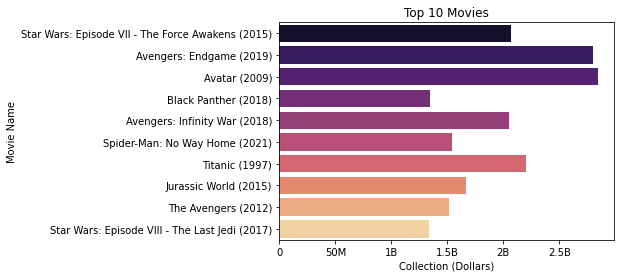

In [ ]:
# PRINTING OUT THE TOP 10 MOVIES BASED ON WORLDWIDE COLLECTIONS

sns.barplot(x='World Sales',y='Title',data = df.head(10),palette='magma')
plt.ylabel('Movie Name')
plt.xlabel('Collection (Dollars)')
plt.title('Top 10 Movies')
plt.xticks([0,2500000000,2000000000,1500000000,1000000000,500000000], ['0',"2.5B",'2B','1.5B','1B','50M'])
plt.show()

In [ ]:
# Taking words from titles such as "2013" and appending them to the release year columns

import re
def rm_year(val):
  if re.search('[(0-9)]{6}' ,val):  # regex for words such as "(2001)"
    pos = re.search('[(0-9)]{6}' ,val).start()  
    return val[pos+1:-1]

df['Release Year'] = df['Title'].apply(rm_year)

In [ ]:
df.head(2)

,Unnamed: 0,Title,Distributor,Release Date,Domestic Sales,International Sales,World Sales,Genre,Movie Runtime,License,Release Year
0,0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2015
1,1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2019


In [ ]:
#Calculating the amount of money collected based on the year.

domestic_sales = df.groupby('Release Year')['Domestic Sales'].sum()
International_sales = df.groupby('Release Year')['International Sales'].sum()
world_sales = df.groupby('Release Year')['World Sales'].sum()

#Creating New DataFrames for Every Sale

domestic_sales = pd.DataFrame(list(domestic_sales.items()),columns = ['Year','Sale'])
International_sales = pd.DataFrame(list(International_sales.items()),columns = ['Year','Sale'])
world_sales = pd.DataFrame(list(world_sales.items()),columns = ['Year','Sale'])

In [ ]:
plt.style.use('ggplot')

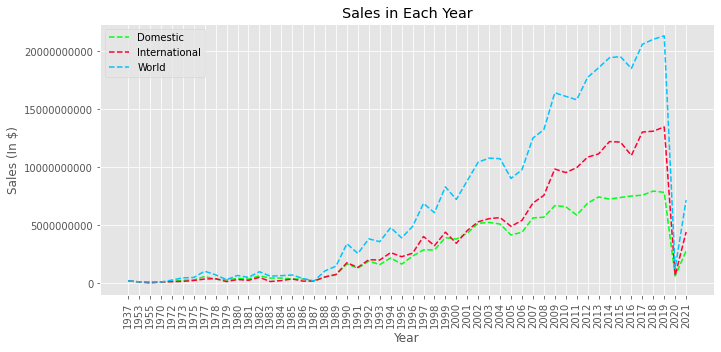

In [ ]:
#Visualizing the total cash collected for each year and sale

plt.figure(figsize=(11, 5))
plt.plot(domestic_sales['Year'],domestic_sales['Sale'],color = '#00ff15',linestyle = '--',label='Domestic')
plt.plot(domestic_sales['Year'],Inte=rnational_sales['Sale'],color = '#ff0033',linestyle = '--',label='International')
plt.plot(domestic_sales['Year'],world_sales['Sale'],color = '#00c3ff',linestyle = '--',label='World')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Sales (In $)')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales in Each Year')
plt.legend()
plt.show()

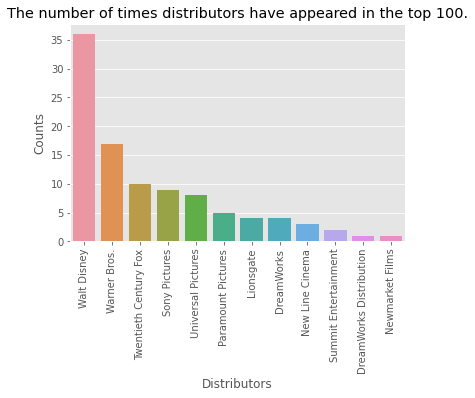

In [ ]:
#The number of times distributors have appeared in the top 100 with respect to domestic sales.
df2 = df.head(100)
df2 = df2['Distributor'].value_counts()
df2 = df2.reset_index()

#I eliminated some words from this titles because it appears to be too long and takes up too much room.

df2.replace({'Walt Disney Studios Motion Pictures':'Walt Disney',
                   'Sony Pictures Entertainment (SPE)':'Sony Pictures'},inplace = True)

sns.barplot(x=df2['index'],y=df2['Distributor'],data = df2)
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.xlabel('Distributors')
plt.title('The number of times distributors have appeared in the top 100.')
plt.show()


In [ ]:
#changing phrases like "2 hours 30 minutes" to "2:30"

def rm_letters(val):
  s = str()
  for letter in val:
    if letter in ['0','1','2','3','4','5','6','7','8','9']:
      s = s+letter
  if len(str(s)) == 1:  # For words such as "3 hrs"
    s = s+'00'
  elif len(str(s)) == 2: # For words such as "3 hrs 9 minutes"
    s = s[0]+'0'+s[1]
  return int(s)
  
df['Movie Runtime'] = df['Movie Runtime'].apply(rm_letters)
df['Movie Runtime']

0      218
1      301
2      242
3      214
4      229
      ... 
913    203
914    122
915    213
916    138
917    142
Name: Movie Runtime, Length: 918, dtype: int64

In [ ]:
#Sorting the values based on Movie Runtime

df3 = df['Movie Runtime']
df3 = df3.reset_index()
df3.sort_values(by='Movie Runtime',ascending = True,inplace = True)
df3['Movie Runtime'].unique()

array([116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 241, 242, 243, 244, 245, 246, 249, 250, 255,
       258, 259, 300, 301, 303, 307, 309, 314, 315, 321])

In [ ]:
List = []
def sep_values(val):
  x = str()
  b1 = True
  for i in val:
    if i.isalpha():
      x += i
    elif i == "'" and b1 == True:
      b1 = False
    elif i == "'" and b1 == False:
      b1 = True
      List.append(x)
      x = str()
      
df['Genre'].apply(sep_values)
print(List[:10])

['Action', 'Adventure', 'SciFi', 'Action', 'Adventure', 'Drama', 'SciFi', 'Action', 'Adventure', 'Fantasy']


In [ ]:
from collections import Counter
Freq = Counter(List)

GenreFreq = pd.DataFrame(list(Freq.items()),columns = ['Genre','Count'])
GenreFreq.sort_values(by='Count', ascending = False,inplace = True)

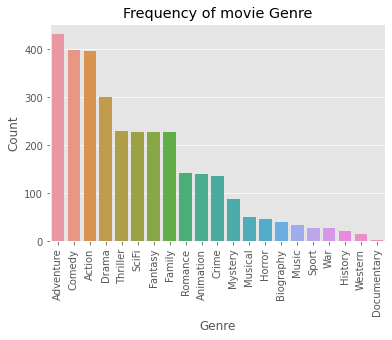

In [ ]:
sns.barplot(x=GenreFreq['Genre'],y=GenreFreq['Count'],data = GenreFreq)
plt.xticks(rotation=90)
plt.title('Frequency of movie Genre')
plt.show()